<a href="https://colab.research.google.com/github/SnehaDharne/OcularDiseaseRecognition/blob/main/odir_crop_images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pathlib
path = '/content/drive/MyDrive/ODIR-dataset/archive/ODIR-5K/ODIR-5K/Training Images'
data_dir_src = pathlib.Path(path)
img_files = list(data_dir_src.glob('**/*jpg'))
img_count = len(img_files)
img_count

7018

In [ ]:
import numpy as np
import os
import PIL
import PIL.Image
import tensorflow as tf
import pandas as pd
import cv2
import pathlib

In [ ]:
path = '/content/drive/MyDrive/ODIR-dataset/archive/ODIR-5K/ODIR-5K/cropped'
data_dir_dst = pathlib.Path(path)
data_dir_dst

In [ ]:
def remove_black_pixels(file_name):
    img_file = os.path.join(data_dir_src, os.path.basename(file_name))
    print(img_file)
    image = cv2.imread(img_file)
    mask = image>0
    coordinates = np.argwhere(mask)

    # Binding box of non-black pixels.
    x0, y0, s0 = coordinates.min(axis=0)
    x1, y1, s1 = coordinates.max(axis=0) + 1  # slices are exclusive at the top

        # Get the contents of the bounding box.
    cropped = image[x0:x1, y0:y1]
    file_cropped = os.path.join(data_dir_dst, os.path.basename(file_name))

    print(file_cropped)
    cv2.imwrite(file_cropped, cropped)
    return file_cropped



In [ ]:
path_to_df = '/content/drive/MyDrive/ODIR-dataset/archive/ODIR-5K/ODIR-5K/data.xlsx'
df = pd.read_excel(path_to_df)

In [ ]:
df['cropped_path_left'] = df['Left-Fundus'].apply(lambda file_name: remove_black_pixels(file_name))
df['cropped_path_right'] = df['Right-Fundus'].apply(lambda file_name: remove_black_pixels(file_name))


Streaming output truncated to the last 5000 lines.
/content/drive/MyDrive/ODIR-dataset/archive/ODIR-5K/ODIR-5K/Training Images/1013_right.jpg
/content/drive/MyDrive/ODIR-dataset/archive/ODIR-5K/ODIR-5K/cropped/1013_right.jpg
/content/drive/MyDrive/ODIR-dataset/archive/ODIR-5K/ODIR-5K/Training Images/1014_right.jpg
/content/drive/MyDrive/ODIR-dataset/archive/ODIR-5K/ODIR-5K/cropped/1014_right.jpg
/content/drive/MyDrive/ODIR-dataset/archive/ODIR-5K/ODIR-5K/Training Images/1015_right.jpg
/content/drive/MyDrive/ODIR-dataset/archive/ODIR-5K/ODIR-5K/cropped/1015_right.jpg
/content/drive/MyDrive/ODIR-dataset/archive/ODIR-5K/ODIR-5K/Training Images/1016_right.jpg
/content/drive/MyDrive/ODIR-dataset/archive/ODIR-5K/ODIR-5K/cropped/1016_right.jpg
/content/drive/MyDrive/ODIR-dataset/archive/ODIR-5K/ODIR-5K/Training Images/1017_right.jpg
/content/drive/MyDrive/ODIR-dataset/archive/ODIR-5K/ODIR-5K/cropped/1017_right.jpg
/content/drive/MyDrive/ODIR-dataset/archive/ODIR-5K/ODIR-5K/Training Images/101

In [ ]:
df.head(3)

,ID,Patient Age,Patient Sex,Left-Fundus,Right-Fundus,Left-Diagnostic Keywords,Right-Diagnostic Keywords,N,D,G,C,A,H,M,O
0,0.0,69.0,Female,0_left.jpg,0_right.jpg,cataract,normal fundus,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1.0,57.0,Male,1_left.jpg,1_right.jpg,normal fundus,normal fundus,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2.0,42.0,Male,2_left.jpg,2_right.jpg,laser spot，moderate non proliferative retinopathy,moderate non proliferative retinopathy,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
ID_idx = df.columns.get_loc('ID')
Left_Fundus_idx = df.columns.get_loc('Left-Fundus')
Right_Fundus_idx = df.columns.get_loc('Right-Fundus')


In [ ]:
for row in df.iterrows():
  print(row[ID_idx])

In [ ]:
img_files[90]

PosixPath('/content/drive/MyDrive/ODIR-dataset/archive/ODIR-5K/ODIR-5K/Training Images/574_left.jpg')

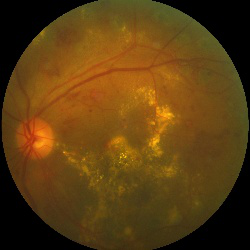

In [ ]:
PIL.Image.open(str(img_files[222]))